In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pyplot
from reimporter import *
import ptvsd
ptvsd.enable_attach()
freeze_modules()

In [29]:
data = pd.read_csv("./heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [30]:
CATEGORICAL_DATA = {"Sex", 'ChestPainType', "RestingECG", "ExcersiveAngina", "ST_Slope"}
NUMERICAL_DATA  = {"Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"}
data = pd.get_dummies(data)
# for col in NUMERICAL_DATA: 
#     data[col] = data[col]/data[col].abs().max()
# data

In [31]:
reimport()
from sklearn.model_selection import train_test_split
from data_loader import DataLoader
data = data.to_numpy()
labels = data[:, -1]
features = data[:, :-1]
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=.2)
train_loader = DataLoader(train_data, train_labels)
test_loader = DataLoader(test_data, test_labels)

In [37]:
reimport()
from neural_network import NeuralNetwork
from loss_and_activations import *
layer_sizes = [25, 50, 1]
activations = [Relu, Relu, Sigmoid]
nn = NeuralNetwork(len(features[0]), layer_sizes, activations)

In [38]:
reimport()
from nn_trainer import NNTrainer
from loss_and_activations import BCE
loss_func = BCE()
trainer = NNTrainer("testing", nn, train_loader, test_loader)

In [39]:
trainer.train(100, 20, .001, loss_func, lr_scheduling=False, lr_step_inc=.01, lr_step_size=5)

d:\Repositories\ECE_759_Project\loss_and_activations.py:10: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-vector))


Epoch: 0, train_loss: 94.9880028616902 test_loss: 30.30141440614323, train_acc: 0.5177111716621253, test_acc: 0.4945652173913043
Epoch: 1, train_loss: 87.20898899271187 test_loss: 31.545311953586523, train_acc: 0.5517711171662125, test_acc: 0.4782608695652174
Epoch: 2, train_loss: 86.62576094567176 test_loss: 31.4414841461261, train_acc: 0.5572207084468664, test_acc: 0.4891304347826087
Epoch: 3, train_loss: 86.34592697193949 test_loss: 32.509659494105726, train_acc: 0.5517711171662125, test_acc: 0.5054347826086957
Epoch: 4, train_loss: 85.98572665609328 test_loss: 32.144309139923024, train_acc: 0.555858310626703, test_acc: 0.483695652173913
Epoch: 5, train_loss: 85.83366932586046 test_loss: 31.568539883814122, train_acc: 0.553133514986376, test_acc: 0.4782608695652174
Epoch: 6, train_loss: 85.59298411193846 test_loss: 30.82003021308862, train_acc: 0.555858310626703, test_acc: 0.4945652173913043
Epoch: 7, train_loss: 85.4049346403727 test_loss: 33.121781238657725, train_acc: 0.557220708

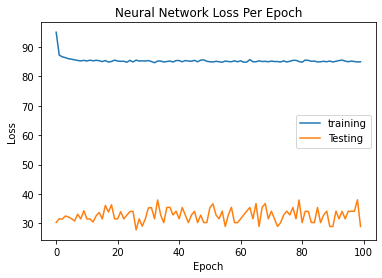

In [40]:
trainer.plot_loss()

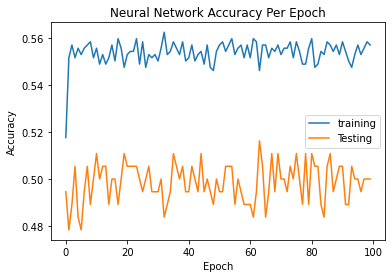

In [41]:
trainer.plot_acc()